In [10]:
from bs4 import BeautifulSoup
import requests, lxml, json, re, datetime, sys

sys.path.append('C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\python_functions\\jl_nlp_pkg')
sys.path.append('C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\python_functions\\jl_model_explain_pkg')
import nlpbasic.textClean as textClean
import nlpbasic.docVectors as DocVector
import nlpbasic.dataExploration as DataExploration
import nlpbasic.lda as lda
import nlpbasic.tfidf as tfidf
import nlpbasic.text_summarize as txtsmr
import nlpbasic.word_embedding as wdembd

import model_explain.plot as meplot
import model_explain.shap as meshap

import data_visualization.distribution_plot as dbplot


headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'
}


C:\Users\luoyan011\.conda\envs\nlp\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Reference: https://serpapi.com/blog/scrape-yahoo-finance-home-page-with-python/

In [30]:
url = 'https://finance.yahoo.com/'
html = requests.get(url, headers=headers)
soup = BeautifulSoup(html.text, 'lxml')

all_script_tags = soup.select('script')

# https://regex101.com/r/IJloEU/2
matched_string = ''.join(re.findall(r'root\.App\.main = (.*);\n+}\(this\)\);\n+</script>', str(all_script_tags)))
matched_string_json = json.loads(matched_string)


def yahoo_get_header_stock_data():
    for key, value in dict(matched_string_json['context']['dispatcher']['stores']['StreamDataStore']['quoteData']).items():
        symbol = value['symbol']
        exchange = value['exchange']
        full_exchange_name = value['fullExchangeName']

        try:
            short_name = value['shortName']
        except:
            short_name = 'no shorten name'

        exchange_time_zone_name = value['exchangeTimezoneName']
        regular_market_change = value['regularMarketChange']['fmt']
        regular_market_previous_close = value['regularMarketPreviousClose']['fmt']
        regular_market_price = value['regularMarketPrice']['fmt']
        regular_market_change_percent = value['regularMarketChangePercent']['fmt']
        market_state = value['marketState']
        market = value['market']
        quote_type = value['quoteType']


        print(f'Symbol: {symbol}\n'
              f'Short name: {short_name}\n'
              f'Exchange: {exchange}\n'
              f'Full exchange name: {full_exchange_name}\n'
              f'Exchange timezone: {exchange_time_zone_name}\n'
              f'Market state: {market_state}\n'
              f'Market name: {market}\n'
              f'Quote type: {quote_type}\n'
              f'Market price: {regular_market_price}\n'
              f'Market change: {regular_market_change}\n'
              f'Market % change: {regular_market_change_percent}\n'
              f'Market previous close: {regular_market_previous_close}\n')



def yahoo_get_top_news_data():
    matched_string_json_stream = matched_string_json['context']['dispatcher']['stores']['ThreeAmigosStore']['data']['ntk']['stream']

    for top_news_result_index, top_news in enumerate(matched_string_json_stream):
        teaser = top_news['editorialContent']['teaser']
        title = top_news['editorialContent']['title']

        try:
            source = top_news['editorialContent']['content']['provider']['displayName']
        except:
            source = None

        try:
            source_site_link = top_news['editorialContent']['content']['provider']['url']
        except:
            source_site_link = None

        try:
            canonical_url = top_news['editorialContent']['content']['canonicalUrl']['url']
        except:
            canonical_url = None

        try:
            canonical_url_website = top_news['editorialContent']['content']['canonicalUrl']['site']
        except:
            canonical_url_website = None

        try:
            click_through_url = top_news['editorialContent']['content']['clickThroughUrl']['url']
        except:
            click_through_url = None

        try:
            click_through_url_website = top_news['editorialContent']['content']['clickThroughUrl']['site']
        except:
            click_through_url_website = None


        print(f'News result number: {top_news_result_index}\n'
              f'Teaser: {teaser}\n'
              f'Title: {title}\n'
              f'Source: {source}\n'
              f'Source website: {source_site_link}\n'
              f'Canonical URL: {canonical_url}\n'
              f'Canonical URL source: {canonical_url_website}\n'
              f'Click through URL: {click_through_url}\n'
              f'Click through website: {click_through_url_website}\n')

        for resolution in top_news['editorialContent']['thumbnail']['resolutions']:
            thumbnail_size = resolution['tag']
            thumbnail_link = resolution['url']
            print(f'{thumbnail_size} {thumbnail_link}')


def yahoo_get_top_news_video_results():
    matched_string_json_video = matched_string_json['context']['dispatcher']['stores']['ThreeAmigosStore']['data']['videos']['stream']

    for top_news_video_index, top_news_video in enumerate(matched_string_json_video):
        video_title = top_news_video['content']['title']
        video_summary = top_news_video['content']['summary']
        video_duration_not_fixed = top_news_video['content']['duration']

        # seconds converted to minutes
        video_duration_fixed_time = datetime.timedelta(seconds=video_duration_not_fixed)
        video_publication_date = top_news_video['content']['pubDate']
        vide_provider_name = top_news_video['content']['provider']['displayName']
        video_canonical_url = top_news_video['content']['canonicalUrl']['url']
        video_click_through_url = top_news_video['content']['clickThroughUrl']['url']

        print(f'Video number: {top_news_video_index}\n'
              f'Title: {video_title}\nSummary: {video_summary}\n'
              f'Duration: {video_duration_fixed_time}\n'
              f'Publication date: {video_publication_date}\n'
              f'Provider: {vide_provider_name}\n'
              f'Canonical URL: {video_canonical_url}\n'
              f'Click through URL: {video_click_through_url}\n')

        for resolution in top_news_video['content']['thumbnail']['resolutions']:
            thumbnail_size = resolution['tag']
            thumbnail_link = resolution['url']
            print(f'{thumbnail_size} {thumbnail_link}')


def yahoo_get_multiuse_news_results():
    matched_string_json_multiuse = matched_string_json['context']['dispatcher']['stores']['ThreeAmigosStore']['data']['multiuse']['stream']

    for multiuse_index, multiuse_news in enumerate(matched_string_json_multiuse):

        multiuse_title = multiuse_news['content']['title']
        multiuse_content_type = multiuse_news['content']['contentType']
        multiuse_summary = multiuse_news['content']['summary']
        multiuse_provider_name = multiuse_news['content']['provider']['displayName']
        multiuse_provider_url = multiuse_news['content']['provider']['url']
        multiuse_canonical_url = multiuse_news['content']['canonicalUrl']['url']
        multiuse_click_through_url = multiuse_news['content']['clickThroughUrl']['url']
        
        print(f'Multiuse news number: {multiuse_index}\n'
              f'Title: {multiuse_title}\n'
              f'Content type: {multiuse_content_type}\n'
              f'Summary: {multiuse_summary}\n'
              f'Provider: {multiuse_provider_name}\n'
              f'Provider URL: {multiuse_provider_url}\n'
              f'Canonical URL: {multiuse_canonical_url}\n'
              f'Click through URL: {multiuse_click_through_url}\n')

        for resolution in multiuse_news['content']['thumbnail']['resolutions']:
            thumbnail_size = resolution['tag']
            thumbnail_link = resolution['url']
            print(f'{thumbnail_size} {thumbnail_link}')


def yahoo_get_news_results():
    for yahoo_news_index in matched_string_json['context']['dispatcher']['stores']['StreamStore']['streams']['mega.c']['data']['stream_items']:
        title = yahoo_news_index['title']
        summary = yahoo_news_index['summary']
#         news_property = yahoo_news_index['property']
        source = yahoo_news_index['publisher']
#         original_publication_url = yahoo_news_index['url']
        yahoo_url = f"https://finance.yahoo.com{yahoo_news_index['link']}"

        try:
            thumbnail_medium = yahoo_news_index['images']['img:440x246']['url']
        except:
            thumbnail_medium = None

        try:
            thumbnail_small = yahoo_news_index['images']['img:220x123']['url']
        except:
            thumbnail_small = None

        print(f'Title: {title}\n'
              f'Summary: {summary}\n'
#               f'Property: {news_property}\n'
              f'Source: {source}\n'
#               f'Original URL: {original_publication_url}\n'
              f'Yahoo URL: {yahoo_url}\n'
              f'Medium thumbnail: {thumbnail_medium}\n'
              f'Small thumbnail: {thumbnail_small}\n')

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [32]:
# yahoo_get_header_stock_data()
# yahoo_get_top_news_data()
# yahoo_get_top_news_video_results()
# yahoo_get_multiuse_news_results()
yahoo_get_news_results()

Title: Warren Buffett saw inflation coming early on — 8 tips to help you come out ahead
Summary: As prices soar, here's how to lessen the impact on your wallet.
Source: MoneyWise
Yahoo URL: https://finance.yahoo.com/news/warren-buffet-saw-inflation-coming-200000608.html
Medium thumbnail: https://s.yimg.com/uu/api/res/1.2/tY8XqQa424bjgarPklycGg--~B/Zmk9c3RyaW07aD0yNDY7cT04MDt3PTQ0MDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/uu/api/res/1.2/PXv2vAmT7QRjFLixXnDu_g--~B/aD00MDA7dz03Mjg7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/moneywise_327/f877f5362a85f7499b43a94ca311c540.cf.jpg
Small thumbnail: https://s.yimg.com/uu/api/res/1.2/5NsGjqWUX2nrG3GhJt4zaw--~B/Zmk9c3RyaW07aD0xMjM7cT04MDt3PTIyMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/uu/api/res/1.2/PXv2vAmT7QRjFLixXnDu_g--~B/aD00MDA7dz03Mjg7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/moneywise_327/f877f5362a85f7499b43a94ca311c540.cf.jpg

Title: Could This Canadian Start-Up Be The Next Facebook?
Summary: Silicon Valley Billionaire Quiet

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Reference:

https://pythoncircle.com/post/678/python-script-14-scraping-news-headlines-using-python-beautifulsoup/




In [8]:
url='https://www.bbc.com/news'
response = requests.get(url, headers=headers)

title = []
soup = BeautifulSoup(response.text, 'html.parser')
headlines = soup.find('body').find_all('h3')
for x in headlines:
    title.append(x.text.strip())
#     print(x.text.strip())
title

["Suicide bombers target Uganda's capital Kampala",
 "Suicide bombers target Uganda's capital Kampala",
 "China warns US about 'playing with fire' on Taiwan",
 'Afghan judges in UK fear for those left behind',
 "What are Biden's challenges at the border?",
 "Life after deportation: 'Living the Mexican dream'",
 'Amazon to pay $500,000 for not sharing Covid data',
 'Myanmar army adds charges against Aung San Suu Kyi',
 'Gas prices soar after setback for Russian pipeline',
 'Pfizer to let poorer nations make new Covid pill',
 'British Columbia battered by huge storm',
 "Wife of Mexico's most wanted cartel boss arrested",
 'British Columbia battered by huge storm',
 "Wife of Mexico's most wanted cartel boss arrested",
 'BBC witnesses scenes of chaos on Poland border',
 'Armenian troops killed in Azerbaijan border clash',
 'New York allows revellers for New Year festivities',
 'How might decisions made at COP26 change our lives?',
 "'Paris built the arena, Glasgow starts the race'",
 'Rely

In [11]:
title_tokens = textClean.pipeline(title, multi_gram = [1], lower_case=True, 
                                           deacc=False, encoding='utf8', errors='strict', stem_lemma = 'lemma', 
                                           tag_drop = [], nltk_stop=True, 
                                           stop_word_list=[], 
                                           check_numbers=False, word_length=2, remove_consecutives=True)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


['touch', 'app', 'mobile', 'get', 'spoilt', 'biden', 'challenge', 'think', 'tv', 'public', 'newsletter', 'could', 'daily', 'detail', 'killer', 'picture', 'radio', 'service', 'summit', 'green', 'supercontinent', 'ancient', 'relic', 'city', 'planet', 'well', 'new', 'five', 'item', 'news']


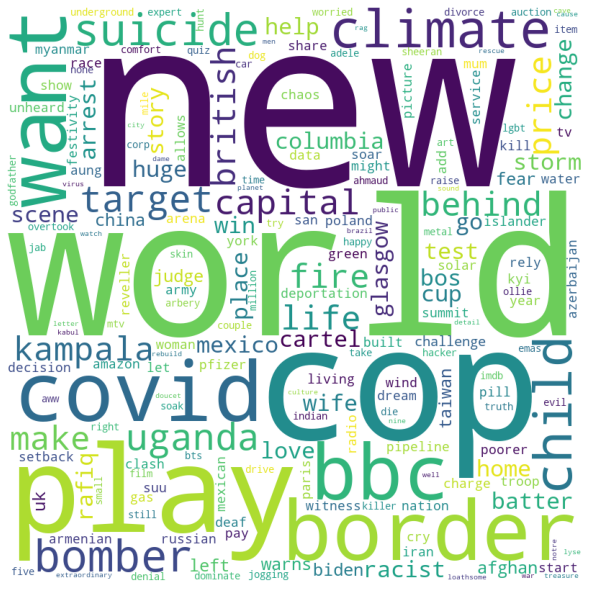

,Topics,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,1,cop,climate,change,border,child,glasgow,love,story,nine,doucet
1,2,world,play,home,cup,go,behind,earn,semi,draw,wale
2,3,bbc,help,world,scene,fire,covid,test,get,child,ollie
3,4,new,want,bomber,target,uganda,wife,kampala,huge,cartel,capital
4,5,world,play,win,place,life,army,netherlands,charge,add,san


In [28]:
newstokens = title_tokens.copy()
print(tfidf.get_top_n_tfidf_bow(newstokens, no_below = 1,top_n_tokens = 30))
DataExploration.generate_word_cloud(newstokens)
lda_allbow, bow_corpus, dictionary = lda.fit_lda(newstokens,no_below = 1, num_topics = 5)
lda.lda_topics(lda_allbow)

In [29]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_allbow, bow_corpus, dictionary)
vis

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.151371  0.033620       1        1  24.367293
2     -0.079091  0.083069       2        1  23.718082
0     -0.015221 -0.112998       3        1  20.889303
1     -0.042050  0.010889       4        1  16.131315
4     -0.015010 -0.014579       5        1  14.894006, topic_info=       Term      Freq     Total Category  logprob  loglift
77   change  1.000000  1.000000  Default  30.0000  30.0000
104   world  3.000000  3.000000  Default  29.0000  29.0000
62      bbc  2.000000  2.000000  Default  28.0000  28.0000
213     cup  1.000000  1.000000  Default  27.0000  27.0000
18   border  2.000000  2.000000  Default  26.0000  26.0000
..      ...       ...       ...      ...      ...      ...
104   world  0.602035  3.800667   Topic5  -4.3747   0.0616
8      play  0.601993  2.145642   Topic5  -4.3747   0.6333
181   place  0.601755  1.610188   Topic5  -4.3751   0.9200
22     life  0.601636  1.610195   Topic5  -4.3753   0.9198
178    love  0.601228  1.610243   Topic5  -4.3760   0.9190

[217 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
30        5  0.951974     add
122       2  0.882905   adele
11        4  0.943218  afghan
144       4  0.943214  ahmaud
72        1  0.880576  allows
...     ...       ...     ...
104       4  0.263112   world
104       5  0.263112   world
169       3  0.902124   would
75        1  0.880577    year
76        1  0.880573    york

[209 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])

In [69]:
import pandas as pd
title_dt = pd.DataFrame(title)
title_dt.columns = ['title']
title_dt['index'] = title_dt.index
title_dt['title_tokens'] = textClean.pipeline(title, multi_gram = [1], lower_case=False, 
                                              deacc=False, encoding='utf8', errors='strict', stem_lemma = '', 
                                              tag_drop = [], 
                                              nltk_stop=True, 
                                              stop_word_list=[], 
                                              check_numbers=False, word_length=2, remove_consecutives=True)
title_dt = title_dt[1:]
title_dt.head(3)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,title,index,title_tokens
1,Suicide bombers target Uganda's capital Kampala,1,"[Suicide, bombers, target, Uganda, capital, Ka..."
2,China warns US about 'playing with fire' on Ta...,2,"[China, warns, US, playing, fire, Taiwan]"
3,Afghan judges in UK fear for those left behind,3,"[Afghan, judges, UK, fear, left, behind]"


In [74]:
selected_words = ['climate']
corseid = list(title_dt['index'])
tfidf_data = tfidf.get_tfidf_dataframe(title_dt['title_tokens'], doc_index = corseid, no_below =1, no_above = 0.5, keep_n = 100000)

filter_data = tfidf_data[tfidf_data.bow.isin(selected_words)]
test = DataExploration.get_similarity_cosin(tfidf_data, filter_data, 'bow', doc_key = 'doc_id', filterbase='base')#, comp_col = 'tfidf_value', topn_output = 10)
recommend_course = title_dt[title_dt.index.isin(test.compareindex.to_list())].title.to_list()
recommend_course 


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


['How green was the COP26 climate summit?',
 'The truth behind the new climate change denial',
 'COP26 is over, but the climate experts are still worried']